The largest dataset with people wearing face masks 250,000 images, 4 types of mask worn, 60,000 unique faces. 

All images were collected using the Toloka.ai crowdsourcing service and validated by TrainingData.ru. 

Each object contains image size, photo type, person's age, gender, user ID.

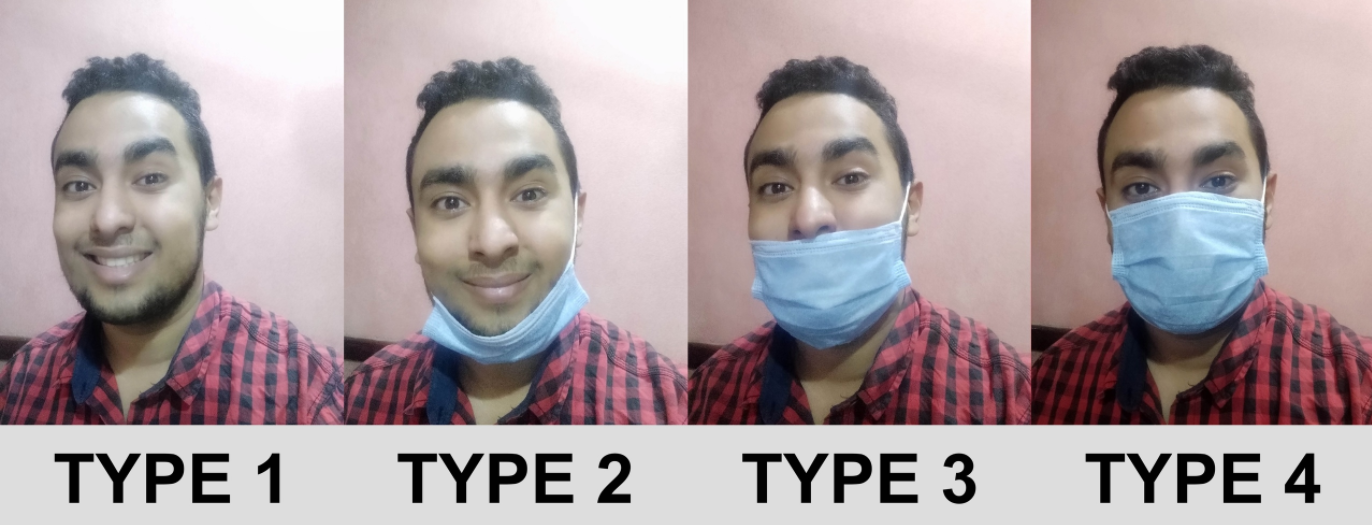

**TYPES**

*TYPE 1 - There is no mask on the face.*

*TYPE 2 - The mask is on, but does not cover the nose or mouth.*

*TYPE 3 - The mask covers the mouth, but does not cover the nose.*

*TYPE 4 - The mask is worn correctly, covers the nose and mouth.*

## IMPORTING LIBRARIES

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"SkLearn version : SkLearn {sklearn.__version__}")
# Magic Functions for In-Notebook Display
%matplotlib inline
# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

Numpy version : Numpy 1.19.5
Pandas version : Pandas 1.1.5
Seaborn version : Seaborn 0.11.1
SkLearn version : SkLearn 0.24.1


## GETTING INSIDE THE DIRECTORY

In [2]:
cd '../input/medical-masks-part1'

/kaggle/input/medical-masks-part1


## MAKING THE DATA FRAME

In [3]:
train = pd.read_csv('df.csv', encoding='latin_1')
# Converting all column names to lower case
train.columns = train.columns.str.lower()
train

id  type  user_id gender  age                         name  size_mb
0          1     1        1   MALE   25  000001_1_000001_MALE_25.jpg     1.80
1          1     2        1   MALE   25  000001_2_000001_MALE_25.jpg     1.74
2          1     3        1   MALE   25  000001_3_000001_MALE_25.jpg     1.80
3          1     4        1   MALE   25  000001_4_000001_MALE_25.jpg     1.74
4          2     1        2   MALE   23  000002_1_000002_MALE_23.jpg     1.55
...      ...   ...      ...    ...  ...                          ...      ...
39995   9999     4     6507   NONE   19  009999_4_006507_NONE_19.jpg     1.97
39996  10000     1     6508   NONE   19  010000_1_006508_NONE_19.jpg     3.84
39997  10000     2     6508   NONE   19  010000_2_006508_NONE_19.jpg     3.64
39998  10000     3     6508   NONE   19  010000_3_006508_NONE_19.jpg     4.07
39999  10000     4     6508   NONE   19  010000_4_006508_NONE_19.jpg     4.28

[40000 rows x 7 columns]

## LET'S GET SOME INSIGHTS AND STATISTICS OF THE DATA WE HAVE

In [4]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40000 non-null  int64  
 1   type     40000 non-null  int64  
 2   user_id  40000 non-null  int64  
 3   gender   40000 non-null  object 
 4   age      40000 non-null  int64  
 5   name     40000 non-null  object 
 6   size_mb  40000 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.1+ MB


id     type  user_id      age  size_mb
count 40000.00 40000.00 40000.00 40000.00 40000.00
mean   5000.50     2.50  2924.69    27.00     2.14
std    2886.79     1.12  1869.44    21.35     1.51
min       1.00     1.00     1.00    18.00     0.01
25%    2500.75     1.75  1245.75    21.00     1.14
50%    5000.50     2.50  2865.00    25.00     1.74
75%    7500.25     3.25  4450.25    30.00     2.77
max   10000.00     4.00  6508.00  2019.00    11.11

## EXPLORATORY DATA ANALYSIS & DATA PRE-PROCESSING

**LETS CHECK ON ID AND USER ID:**

In [5]:
train['id'].nunique()

10000

In [8]:
train['user_id'].nunique()

6508

**WE CAN SEE THAT ID AND USER_ID COUNTS VARY THAT MEANS THAT WE HAVE SOME DUPLICATE DATA OR WE HAVE MORE THEN 4 IMAGES OF A SINGLE PERSON. LET'S SEE HOW THESE DUPLICATES ARE DISTRIBUTED:**

[Text(0.5, 0, 'Number of images given to a single person'),
 Text(0, 0.5, 'USER ID')]

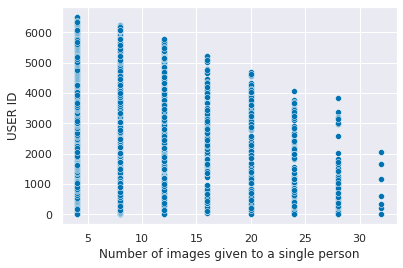

In [9]:
uniqueUID = pd.DataFrame(list(train['user_id'].value_counts().index))
uniqueUID['user_id'] = list(train['user_id'].value_counts())
ax = sns.scatterplot(uniqueUID['user_id'], uniqueUID[0])
ax.set(xlabel="Number of images given to a single person", ylabel = "USER ID")

**WE CAN SEE THAT OUR OBSERVATION WAS RIGHT. THERE ARE 7 CASES IN DATA WHERE A SINGLE PERSON HAS MORE THEN 30 IMAGES. SO, BEFORE WE FILTER OUT THOSE DATA, IF YOU LOOK AT THE DATAFRAME AGAIN *(PRINTED BELOW)* YOU WILL NOTICE THAT THERE ARE SOME DATA WITH NONE IN GENDER. SO, LETS GET RID OF THOSE FIRST.**

In [10]:
train

id  type  user_id gender  age                         name  size_mb
0          1     1        1   MALE   25  000001_1_000001_MALE_25.jpg     1.80
1          1     2        1   MALE   25  000001_2_000001_MALE_25.jpg     1.74
2          1     3        1   MALE   25  000001_3_000001_MALE_25.jpg     1.80
3          1     4        1   MALE   25  000001_4_000001_MALE_25.jpg     1.74
4          2     1        2   MALE   23  000002_1_000002_MALE_23.jpg     1.55
...      ...   ...      ...    ...  ...                          ...      ...
39995   9999     4     6507   NONE   19  009999_4_006507_NONE_19.jpg     1.97
39996  10000     1     6508   NONE   19  010000_1_006508_NONE_19.jpg     3.84
39997  10000     2     6508   NONE   19  010000_2_006508_NONE_19.jpg     3.64
39998  10000     3     6508   NONE   19  010000_3_006508_NONE_19.jpg     4.07
39999  10000     4     6508   NONE   19  010000_4_006508_NONE_19.jpg     4.28

[40000 rows x 7 columns]

**HERE WE WILL USE THE IN BUILT QUERY FEATURE OF PANDAS DATA FRAME TO GET RID OF THOSE NONE DATA:**

In [11]:
a = pd.DataFrame(train.query('gender != "NONE"'))

**AFTER ANY KIND OF DATA OPERATION PERFORM WE NEED TO CHECK IF THE DATA IS BALANCED FOR EVERY CLASS OR NOT.**

In [12]:
a['type'].value_counts()

4    6741
3    6741
2    6741
1    6741
Name: type, dtype: int64

**ALL THE CLASSES ARE DISTRIBUTED EVENLY. NOW, LETS DEAL WITH USER_ID.**

[Text(0.5, 0, 'Number of images given to a single person'),
 Text(0, 0.5, 'USER ID')]

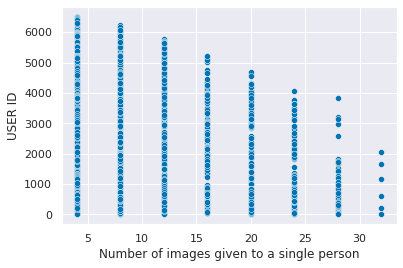

In [13]:
uniqueUID = pd.DataFrame(list(a['user_id'].value_counts().index))
uniqueUID['user_id'] = list(a['user_id'].value_counts())
ax = sns.scatterplot(uniqueUID['user_id'], uniqueUID[0])
ax.set(xlabel="Number of images given to a single person", ylabel = "USER ID")

**LET'S FIRST HAVE A LOOK OF DATA SET WITHOUT NONE VALUES**

In [15]:
a

id  type  user_id  gender  age                           name  \
0         1     1        1    MALE   25    000001_1_000001_MALE_25.jpg   
1         1     2        1    MALE   25    000001_2_000001_MALE_25.jpg   
2         1     3        1    MALE   25    000001_3_000001_MALE_25.jpg   
3         1     4        1    MALE   25    000001_4_000001_MALE_25.jpg   
4         2     1        2    MALE   23    000002_1_000002_MALE_23.jpg   
...     ...   ...      ...     ...  ...                            ...   
39987  9997     4     6506  FEMALE   24  009997_4_006506_FEMALE_24.jpg   
39988  9998     1     5228  FEMALE   42  009998_1_005228_FEMALE_42.jpg   
39989  9998     2     5228  FEMALE   42  009998_2_005228_FEMALE_42.jpg   
39990  9998     3     5228  FEMALE   42  009998_3_005228_FEMALE_42.jpg   
39991  9998     4     5228  FEMALE   42  009998_4_005228_FEMALE_42.jpg   

       size_mb  
0         1.80  
1         1.74  
2         1.80  
3         1.74  
4         1.55  
...        ...  
39987     4.21  
39988     1.10  
39989     1.11  
39990     1.06  
39991     1.08  

[26964 rows x 7 columns]

**IF YOU NOTICE THAT THE LAST FEW ROWS YOU WILL SEE THAT USER_ID IS 5228 AND ID IS 9998 THAT MEANS THAT 5228 HAS MORE THEN 4 IMAGES SO LET'S HAVE A LOOK**

In [16]:
q = pd.DataFrame(a.query('user_id == 5228'))
q

id  type  user_id  gender  age                           name  \
27932  6984     1     5228  FEMALE   42  006984_1_005228_FEMALE_42.jpg   
27933  6984     2     5228  FEMALE   42  006984_2_005228_FEMALE_42.jpg   
27934  6984     3     5228  FEMALE   42  006984_3_005228_FEMALE_42.jpg   
27935  6984     4     5228  FEMALE   42  006984_4_005228_FEMALE_42.jpg   
31152  7789     1     5228  FEMALE   42  007789_1_005228_FEMALE_42.jpg   
31153  7789     2     5228  FEMALE   42  007789_2_005228_FEMALE_42.jpg   
31154  7789     3     5228  FEMALE   42  007789_3_005228_FEMALE_42.jpg   
31155  7789     4     5228  FEMALE   42  007789_4_005228_FEMALE_42.jpg   
35556  8890     1     5228  FEMALE   42  008890_1_005228_FEMALE_42.jpg   
35557  8890     2     5228  FEMALE   42  008890_2_005228_FEMALE_42.jpg   
35558  8890     3     5228  FEMALE   42  008890_3_005228_FEMALE_42.jpg   
35559  8890     4     5228  FEMALE   42  008890_4_005228_FEMALE_42.jpg   
39988  9998     1     5228  FEMALE   42  009998_1_005228_FEMALE_42.jpg   
39989  9998     2     5228  FEMALE   42  009998_2_005228_FEMALE_42.jpg   
39990  9998     3     5228  FEMALE   42  009998_3_005228_FEMALE_42.jpg   
39991  9998     4     5228  FEMALE   42  009998_4_005228_FEMALE_42.jpg   

       size_mb  
27932     0.96  
27933     0.89  
27934     0.90  
27935     0.83  
31152     1.13  
31153     1.03  
31154     1.03  
31155     1.05  
35556     0.91  
35557     0.83  
35558     0.74  
35559     0.73  
39988     1.10  
39989     1.11  
39990     1.06  
39991     1.08

**OUR GUESS WAS RIGHT AGAIN, IT HAS 16 COUNTS. LETS SEE IF THEY ALL ARE SAME PERSON OR NOT.**

In [17]:
cd images

/kaggle/input/medical-masks-part1/images


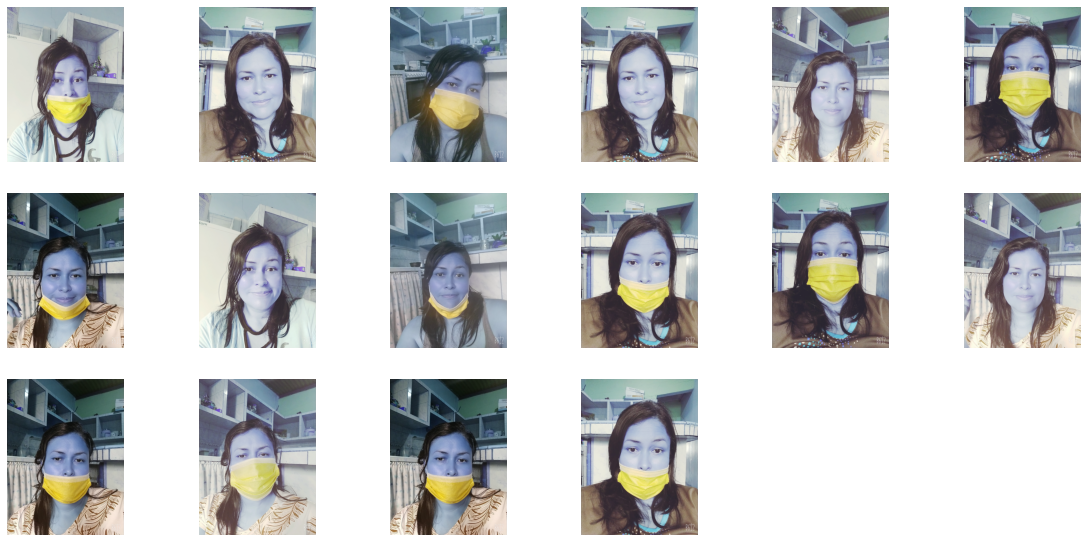

In [30]:
import cv2
imgs = []
for i in list(np.array(q["name"])):
    im = cv2.imread(i)
    imgs.append(im)
    
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(imgs),16))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(imgs[i])   
    plt.axis('off')


**WE CAN SEE THAT THEY ARE ALL SAME PERSON. SO, LET'S DROP OF THIS EXTRA DATA SO WE ONLY HAVE MEANINGFULL DATA TO WORK WITH**

In [31]:
#LET'S GO BACK TO PREVIOUS DIRECTORY
cd ..


/kaggle/input/medical-masks-part1


**WE HERE FILTER OUT EXTRA IMAGES**

In [32]:
newdf = []
cuid = []
for i in np.array(a):
    if cuid.count(i[2]) < 4 or len(cuid) == 0:
        newdf.append(i)
        cuid.append(i[2])
        

In [33]:
c = a.columns

**THE NEW DATAFRAME**

In [34]:
newdf = pd.DataFrame(np.array(newdf), columns = c)

In [36]:
newdf

id type user_id  gender age                           name size_mb
0         1    1       1    MALE  25    000001_1_000001_MALE_25.jpg    1.80
1         1    2       1    MALE  25    000001_2_000001_MALE_25.jpg    1.74
2         1    3       1    MALE  25    000001_3_000001_MALE_25.jpg    1.80
3         1    4       1    MALE  25    000001_4_000001_MALE_25.jpg    1.74
4         2    1       2    MALE  23    000002_1_000002_MALE_23.jpg    1.55
...     ...  ...     ...     ...  ..                            ...     ...
15367  9995    4    6505    MALE  21    009995_4_006505_MALE_21.jpg    0.71
15368  9997    1    6506  FEMALE  24  009997_1_006506_FEMALE_24.jpg    5.28
15369  9997    2    6506  FEMALE  24  009997_2_006506_FEMALE_24.jpg    5.45
15370  9997    3    6506  FEMALE  24  009997_3_006506_FEMALE_24.jpg    4.57
15371  9997    4    6506  FEMALE  24  009997_4_006506_FEMALE_24.jpg    4.21

[15372 rows x 7 columns]

In [35]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15372 entries, 0 to 15371
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       15372 non-null  object
 1   type     15372 non-null  object
 2   user_id  15372 non-null  object
 3   gender   15372 non-null  object
 4   age      15372 non-null  object
 5   name     15372 non-null  object
 6   size_mb  15372 non-null  object
dtypes: object(7)
memory usage: 840.8+ KB


[Text(0.5, 0, 'Number of images given to a single person'),
 Text(0, 0.5, 'USER ID')]

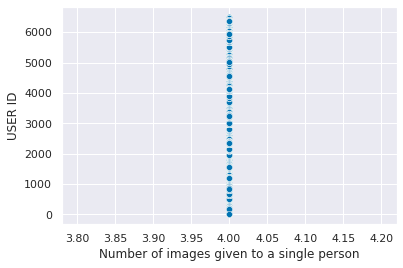

In [37]:
uniqueUID = pd.DataFrame(list(newdf['user_id'].value_counts().index))
uniqueUID['user_id'] = list(newdf['user_id'].value_counts())
ax = sns.scatterplot(uniqueUID['user_id'], uniqueUID[0])
ax.set(xlabel="Number of images given to a single person", ylabel = "USER ID")

**NOW THE PROBLEM OF USER_ID IS SOLVED! LET'S LOOK AT ANOTHER FEATURE, AND BEFORE WE DO THAT LET'S CHECK AGAIN IF THE DATA IS BALANCED OR NOT.**

In [38]:
newdf['type'].value_counts()

4    3843
3    3843
2    3843
1    3843
Name: type, dtype: int64

**DATA IS BALANCED, LET'S HAVE A LOOK AT SIZE_MB**

<AxesSubplot:xlabel='size_mb'>

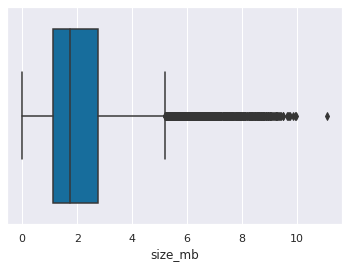

In [39]:
sns.boxplot(newdf['size_mb'])

**WE CAN SEE A LOT OF OUTLIER'S HERE! LET'S JUST GET RID OF THESE. WE WILL PANDAS QUERY TO ACHIEVE THIS:**

In [40]:
slicer = pd.DataFrame(newdf.query('size_mb > 4'))
slicer = list(slicer['user_id'].unique())
len(slicer)

578

In [41]:
for i in slicer:
    indexNames = newdf[newdf['user_id'] == i].index
    # Delete these row indexes from dataFrame
    newdf.drop(indexNames , inplace=True)

<AxesSubplot:xlabel='size_mb'>

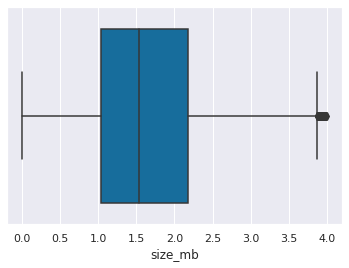

In [42]:
sns.boxplot(newdf['size_mb'])

**NOW, THE SIZE_MB IS FREE FROM OUTLIERS. LET'S DEAL WITH AGE.**

In [43]:
newdf['id'] = newdf['id'].astype(int)
newdf['user_id'] = newdf['user_id'].astype(int)
newdf['age'] = newdf['age'].astype(int)
newdf['size_mb'] = newdf['size_mb'].astype(float)

In [44]:
newdf.describe() 

id  user_id      age  size_mb
count 13060.00 13060.00 13060.00 13060.00
mean   3715.79  3032.28    27.09     1.64
std    2839.95  1926.99     7.98     0.86
min       1.00     1.00    18.00     0.01
25%    1278.00  1278.00    21.00     1.04
50%    2912.00  2912.00    25.00     1.53
75%    5909.00  4673.00    31.00     2.17
max    9995.00  6505.00   103.00     4.00

<AxesSubplot:xlabel='age'>

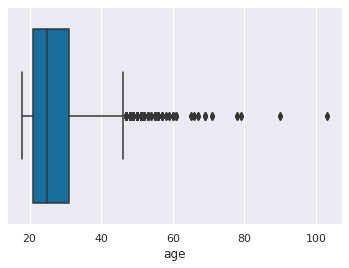

In [45]:
sns.boxplot(newdf['age'])

**AGE HAS OUTLIERS TOO. LET'S WORK ON IT.**

In [46]:
slicer = pd.DataFrame(newdf.query('age > 50'))
slicer = list(slicer['age'].unique())
len(slicer)
for i in slicer:
    indexNames = newdf[newdf['age'] == i].index
    # Delete these row indexes from dataFrame
    newdf.drop(indexNames , inplace=True)

**AFTER QUERING, WE CAN SEE THE BOXPLOT BELOW THAT WE ARE FREE FROM OUTLIERS IN AGE.**

<AxesSubplot:xlabel='age'>

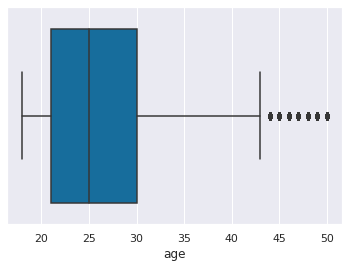

In [47]:
sns.boxplot(newdf['age'])

**LET'S CHECK AGAIN IF THE DISTRIBUTION IS EVEN OR NOT.**

In [50]:
newdf['type'].value_counts()

4    3215
3    3215
2    3215
1    3215
Name: type, dtype: int64

In [51]:
newdf.describe()

id  user_id      age  size_mb
count 12860.00 12860.00 12860.00 12860.00
mean   3709.65  3027.10    26.60     1.64
std    2841.49  1928.57     6.87     0.86
min       1.00     1.00    18.00     0.01
25%    1273.00  1273.00    21.00     1.04
50%    2905.00  2905.00    25.00     1.53
75%    5906.00  4670.00    30.00     2.17
max    9995.00  6505.00    50.00     4.00

In [53]:
newdf.shape

(12860, 7)

## TRAINING

**NOW WE ARE DONE WITH EDA AND DATA PRE-PROCESSING. LET'S BEGIN THE TRAINING. WE WILL BE USING ONLY 4000 OF THE IMAGES SO THAT LESS COMPUTATION TIME IS TAKEN FOR TRAINING AND READING THE IMAGES AND REMAINING WE WILL USE FOR TESTING**

In [54]:
training = pd.DataFrame(newdf[:4000])
testing = pd.DataFrame(newdf[8000:])

In [55]:
training

id type  user_id gender  age                         name  size_mb
0        1    1        1   MALE   25  000001_1_000001_MALE_25.jpg     1.80
1        1    2        1   MALE   25  000001_2_000001_MALE_25.jpg     1.74
2        1    3        1   MALE   25  000001_3_000001_MALE_25.jpg     1.80
3        1    4        1   MALE   25  000001_4_000001_MALE_25.jpg     1.74
4        2    1        2   MALE   23  000002_1_000002_MALE_23.jpg     1.55
...    ...  ...      ...    ...  ...                          ...      ...
4671  1655    4     1655   MALE   20  001655_4_001655_MALE_20.jpg     1.08
4672  1658    1     1658   MALE   22  001658_1_001658_MALE_22.jpg     2.28
4673  1658    2     1658   MALE   22  001658_2_001658_MALE_22.jpg     2.28
4674  1658    3     1658   MALE   22  001658_3_001658_MALE_22.jpg     2.28
4675  1658    4     1658   MALE   22  001658_4_001658_MALE_22.jpg     2.28

[4000 rows x 7 columns]

**LET'S GO IN IMAGE DIRECTORY TO GET OUR DATA**

In [56]:
cd images

/kaggle/input/medical-masks-part1/images


**GETTING IMAGES**

In [57]:
import glob as gb
import cv2
from tqdm import tqdm
X = []
y = []
s = 299
for i in tqdm(list((training['name']))):
    image = cv2.imread(i)
    image_array = cv2.resize(image , (s,s))
    X.append(list(image_array))
    y.append(int(i.split("_")[1])-1)
    

100%|██████████| 4000/4000 [08:04<00:00,  8.26it/s]


**LET'S HAVE A LOOK AT DATA WITH LABELS**

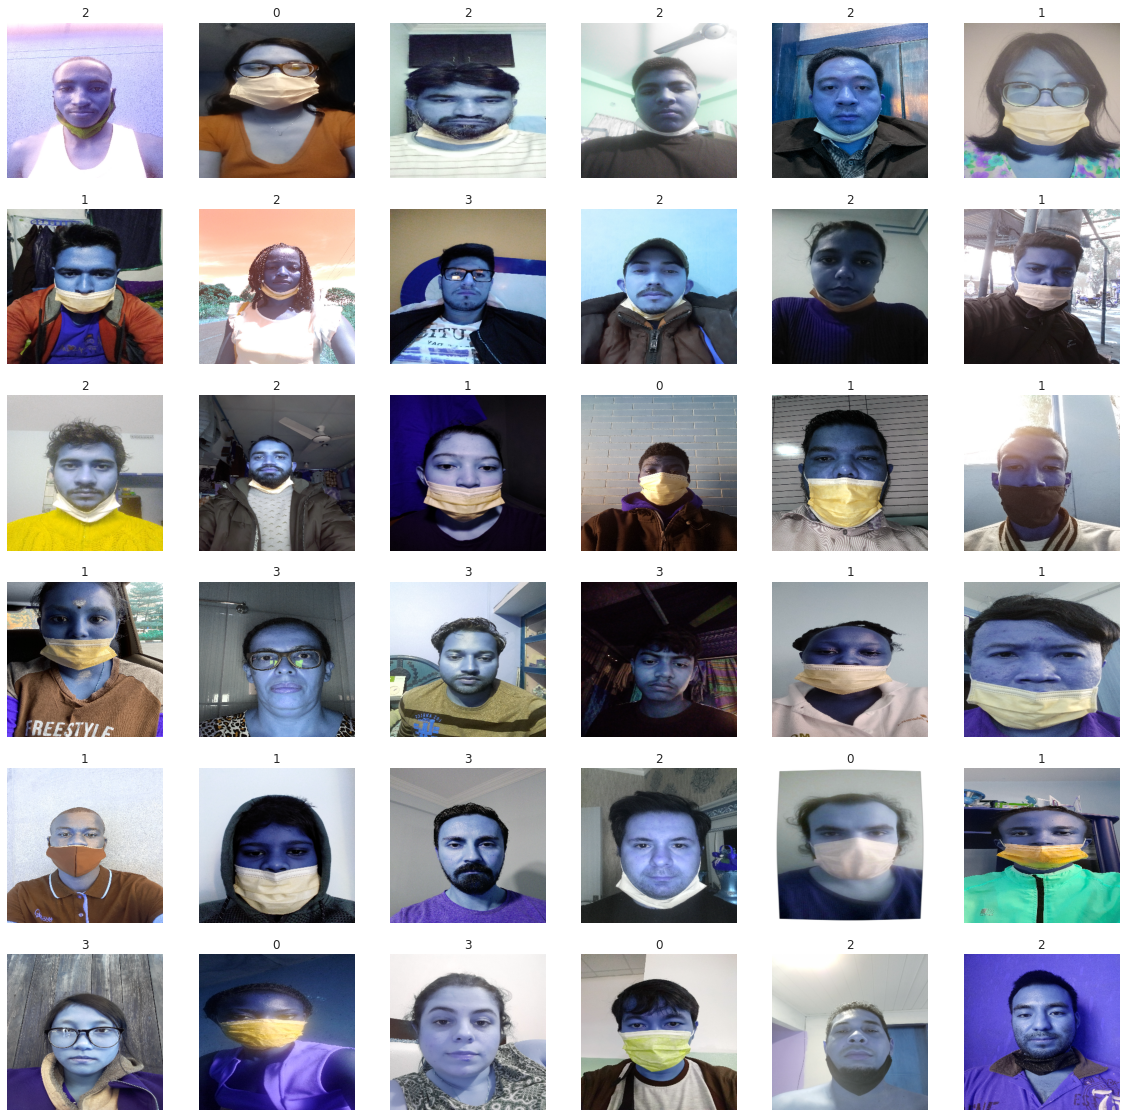

In [59]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X[i])   
    plt.axis('off')
    plt.title(y[i])

**CONVERTING TO NUMPY ARRAY FOR TRAINING**

In [58]:
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(4000, 299, 299, 3)
(4000,)


**GETTING LIBRARIES FOR TRAINING OUR DEEP LEARNING MODEL**

In [60]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import Xception #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

**SPLITTING THE DATA**

In [61]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=.3)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(2800, 299, 299, 3)
(2800,)
(1200, 299, 299, 3)
(1200,)


**ENCODING OUR LABELS**

In [62]:
from keras.utils import to_categorical
#One Hot Encoding
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
#Verifying the dimension after one hot encoding
print((X_train.shape,y_train.shape))
print((X_val.shape,y_val.shape))

((2800, 299, 299, 3), (2800, 4))
((1200, 299, 299, 3), (1200, 4))


**DEFINING THE PRE-TRAINED MODEL XCEPTION AND ADDING IT THE LAST DENSE LAYER TO IT FOR OUR FOUR CLASSES**

In [63]:
import tensorflow as tf
import keras
from keras.applications.xception import Xception
model=Xception(include_top = False, weights = 'imagenet', input_shape = (299,299,3))
flattened = tf.keras.layers.Flatten()(model.output)

fc1 = tf.keras.layers.Dense(4, activation='softmax', name="AddedDense2")(flattened)

model = tf.keras.models.Model(inputs=model.input, outputs=fc1) 

83689472/83683744 [==============================] - 2s 0us/step


**COMPILING THE MODEL**

In [64]:
model.compile(optimizer ='adamax',loss='categorical_crossentropy',metrics=['accuracy'])

print('Model Details are : ')
print(model.summary())

Model Details are : 
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_________________________________________________________________________

**FITTING THE MODEL**

In [65]:

from keras.callbacks import ModelCheckpoint, EarlyStopping   
callbacks_list = [  
    ModelCheckpoint('/kaggle/working/AMD.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True),
]  

ThisModel = model.fit(X_train, y_train, epochs=10, callbacks=callbacks_list, verbose=1, validation_data=(X_val,y_val))

Epoch 1/10
88/88 [==============================] - 77s 784ms/step - loss: 1.6615 - accuracy: 0.6401 - val_loss: 0.3746 - val_accuracy: 0.9158

Epoch 00001: val_accuracy improved from -inf to 0.91583, saving model to /kaggle/working/AMD.h5
Epoch 2/10
88/88 [==============================] - 67s 767ms/step - loss: 0.0772 - accuracy: 0.9763 - val_loss: 0.1330 - val_accuracy: 0.9642

Epoch 00002: val_accuracy improved from 0.91583 to 0.96417, saving model to /kaggle/working/AMD.h5
Epoch 3/10
88/88 [==============================] - 67s 767ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0879 - val_accuracy: 0.9783

Epoch 00003: val_accuracy improved from 0.96417 to 0.97833, saving model to /kaggle/working/AMD.h5
Epoch 4/10
88/88 [==============================] - 67s 766ms/step - loss: 0.0209 - accuracy: 0.9925 - val_loss: 0.1156 - val_accuracy: 0.9767

Epoch 00004: val_accuracy did not improve from 0.97833
Epoch 5/10
88/88 [==============================] - 67s 765ms/step - loss: 

**LET'S LOOK AT PROGRESS:**

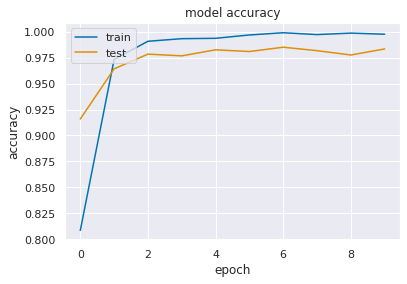

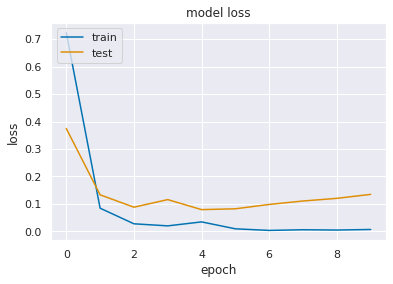

In [66]:
# summarize history for accuracy
plt.plot(ThisModel.history['accuracy'])
plt.plot(ThisModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(ThisModel.history['loss'])
plt.plot(ThisModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**SAVING THE MODEL**

In [67]:
from keras.models import load_model
model.save("/kaggle/working/AMD.h5")
#LOADING THE BEST MODEL
model = load_model("/kaggle/working/AMD.h5")

**LET'S CHECK HOW MODEL PERFORMS ON VALIDATION DATA**

In [68]:
y_pred1a = model.predict(X_val, verbose=1)      
y_pred_bool1a = np.round(np.array([list(i) for i in y_pred1a]))
from sklearn.metrics import accuracy_score
print("THE ACCURACY SCORE IS: {}".format(accuracy_score(y_val, y_pred_bool1a)))
from sklearn.metrics import roc_auc_score
print("THE AUCROC SCORE IS: {}".format(roc_auc_score(y_val, y_pred_bool1a)))
from sklearn.metrics import average_precision_score     
print("THE PRAUC SCORE IS: {}".format(average_precision_score(y_val, y_pred_bool1a))) 

38/38 [==============================] - 5s 128ms/step
THE ACCURACY SCORE IS: 0.9833333333333333
THE AUCROC SCORE IS: 0.9889604365830096
THE PRAUC SCORE IS: 0.9710889159168452


**DEFINING A PREDICTOR FUNCTION**

In [77]:
def predictor(a):
    image = cv2.imread(a)
    image_array = cv2.resize(image , (299,299))
    image = list(image_array)
    im = []
    im.append(image)
    a = np.array(im)
    one = "The mask is worn correctly, covers the nose and mouth."
    two = "The mask covers the mouth, but does not cover the nose."
    three =  "The mask is on, but does not cover the nose and mouth."
    four = "There is no mask on the face."
    a = model.predict(a)
    a = [int(np.round(j)) for i in a for j in i]
    if a == [1, 0, 0, 0]:
#         s = 0
        s = one
        return s
    elif a == [0, 1, 0, 0]:
#         s = 1
        s=two
        return s
    elif a == [0, 0, 1, 0]:
#         s = 2
        s=three
        return s
    elif [0, 0, 0, 1]:
#         s = 3
        s=four
        return s

## LET'S PREDICT FOR THIS IMAGE

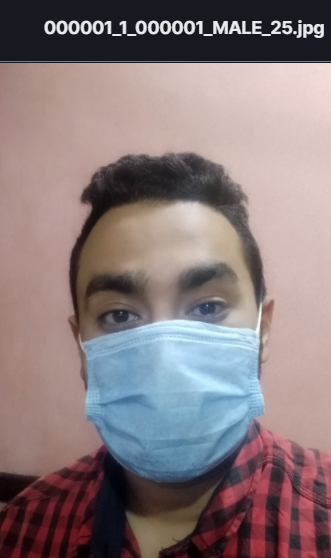

In [78]:
image = predictor('000001_1_000001_MALE_25.jpg')
image

'The mask is worn correctly, covers the nose and mouth.'

## NOW LET'S PREDICT FOR THIS IMAGE:

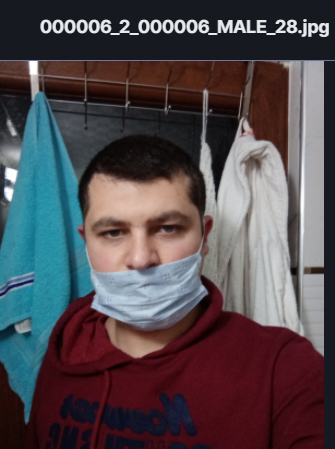

In [79]:
image = predictor('000006_2_000006_MALE_28.jpg')
image

'The mask covers the mouth, but does not cover the nose.'

## NOW LET'S PREDICT FOR THIS IMAGE:

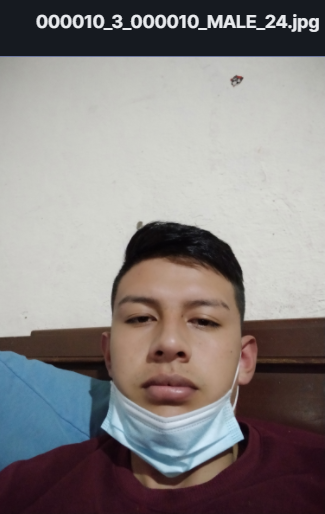

In [80]:
image = predictor('000010_3_000010_MALE_24.jpg')
image

'The mask is on, but does not cover the nose and mouth.'

##  NOW LET'S PREDICT FOR THIS IMAGE:

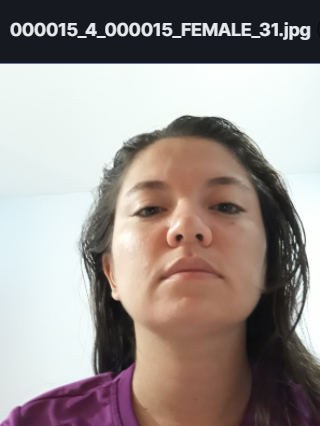

In [81]:
image = predictor('000015_4_000015_FEMALE_31.jpg')
image

'There is no mask on the face.'

## NOW LET'S PREDICT THE TESTING DATA:

In [82]:
testing


id type  user_id gender  age                         name  size_mb
9456   4269    1     3788   MALE   26  004269_1_003788_MALE_26.jpg     0.65
9457   4269    2     3788   MALE   26  004269_2_003788_MALE_26.jpg     0.67
9458   4269    3     3788   MALE   26  004269_3_003788_MALE_26.jpg     0.73
9459   4269    4     3788   MALE   26  004269_4_003788_MALE_26.jpg     0.70
9460   4273    1     3790   MALE   20  004273_1_003790_MALE_20.jpg     1.14
...     ...  ...      ...    ...  ...                          ...      ...
15363  9991    4     6504   MALE   24  009991_4_006504_MALE_24.jpg     1.02
15364  9995    1     6505   MALE   21  009995_1_006505_MALE_21.jpg     0.74
15365  9995    2     6505   MALE   21  009995_2_006505_MALE_21.jpg     0.75
15366  9995    3     6505   MALE   21  009995_3_006505_MALE_21.jpg     0.71
15367  9995    4     6505   MALE   21  009995_4_006505_MALE_21.jpg     0.71

[4860 rows x 7 columns]

**DEIFINING AN ARRAY WITH THE CORRECT VALUES OF CLASS FROM TYPE COLUMN**

In [107]:
actualvalues = np.array(testing["type"])
actualvalues

array([1, 2, 3, ..., 2, 3, 4], dtype=object)

**GETTING THE NAMES OF THE IMAGES**

In [85]:
images = np.array(testing["name"])
images

array(['004269_1_003788_MALE_26.jpg', '004269_2_003788_MALE_26.jpg',
       '004269_3_003788_MALE_26.jpg', ..., '009995_2_006505_MALE_21.jpg',
       '009995_3_006505_MALE_21.jpg', '009995_4_006505_MALE_21.jpg'],
      dtype=object)

**MAKING ARRAY OF PREDICTED VALUES**

In [86]:
predictedvalues = []
for i in images:
    op = predictor(i)
    predictedvalues.append(op)

In [87]:
predictedvalues = np.array(predictedvalues)

In [108]:
predictedvalue = []
for a in tqdm(predictedvalues):
    if a == 'The mask is worn correctly, covers the nose and mouth.':
        s = 1
        predictedvalue.append(s)
    elif a == 'The mask covers the mouth, but does not cover the nose.':
        s = 2
        predictedvalue.append(s)
    elif a == 'The mask is on, but does not cover the nose and mouth.':
        s = 3
        predictedvalue.append(s)
    elif a == 'There is no mask on the face.':
        s = 4
        predictedvalue.append(s)

100%|██████████| 4860/4860 [00:00<00:00, 523910.70it/s]


In [109]:
predictedvalue = np.array(predictedvalue)

**CONVERTING BOTH THE ARRAYS TO CATEGORICAL**

In [110]:
actualvalues=to_categorical(actualvalues)
predictedvalue=to_categorical(predictedvalue)

**CHECKING ACCURACY**

In [111]:
from sklearn.metrics import accuracy_score
print("THE ACCURACY SCORE IS: {}".format(accuracy_score(actualvalues, predictedvalue)))

THE ACCURACY SCORE IS: 0.9757201646090535


**SO, ON TESTING DATA THE ACCURACY IS 97.5%**